In [1]:
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cartopy.mpl.gridliner import LATITUDE_FORMATTER,LONGITUDE_FORMATTER
from cartopy.io.shapereader import Reader, natural_earth
from matplotlib.font_manager import FontProperties
import cartopy.mpl.ticker as cticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_metrics_pts_regional(ax, df, vmin, vmax, metrics_name, title, 
                              y_on=0, x_on=0, 
                              legend_on=1,title_on=0,):
    lbs = 12#labelsize
    fts = 12#fontsize
    ax.coastlines(linewidth=0.5,color='black',resolution='110m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.set_extent([-30, -52, -20, 0])
    gl = ax.gridlines(draw_labels=False,
             crs=ccrs.PlateCarree(),
             dms=True,
             x_inline=False,
             y_inline=False,
             linewidth=0.87,
             color='gray',
             alpha=0.5,
             linestyle='--'
             )
    if y_on==1:
        ax.set_yticks([-20,-10,0], crs=ccrs.PlateCarree())
        ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    if x_on==1:
        ax.set_xticks([-50,-40,-30], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())

    ax.tick_params(which='both', labelsize=10,width=0.5)
    ax.minorticks_on()
    if y_on != 1:
        ax.set_yticklabels([])
    if title_on:
        ax.set_title(f'{title}', fontsize=16)
    ax.add_feature(cfeature.LAND, edgecolor='black',color='papayawhip')
    ax.add_feature(cfeature.RIVERS,color='cornflowerblue', zorder=5)
    ax.add_feature(cfeature.OCEAN, color = '#6e9ece')
    
    if 'bias' in metrics_name:
        cmap='RdBu'
        extend='both'
    elif 'R' in metrics_name:
        cmap='magma_r'
        extend='neither'
    else:
        cmap='magma_r'
        extend='max'
    
    plt.scatter(x=df['Longitude'].tolist(),
                y=df['Latitude'].tolist(),
                c=df[metrics_name].tolist(),
                s=9,
                linewidths=0.5,
                vmin=vmin,
                vmax=vmax,
                zorder=12,
                edgecolors='black',
                cmap=cmap,#'gnuplot2'
                data=df[metrics_name].tolist())
    if legend_on:
        pad=0
        if 'mae' in metrics_name:
            pad=0.08
        else: 
            pad=0.08
        cb = plt.colorbar(ax=ax, extend=extend, aspect=30, shrink=0.8,
                          fraction=0.03, pad=pad, location='bottom')

In [3]:
df_box = pd.read_csv('../plotdata/Brazil_sta_statistic_sum.csv')

bias_US10cm-smlp
bias_US10cm-era
bias_US10cm-gleam
bias_US10cm-esa
R_US10cm-smlp
R_US10cm-era
R_US10cm-gleam
R_US10cm-esa
ubrmse_US10cm-smlp
ubrmse_US10cm-era
ubrmse_US10cm-gleam
ubrmse_US10cm-esa
mae_US10cm-smlp
mae_US10cm-era
mae_US10cm-gleam
mae_US10cm-esa
0 seconds


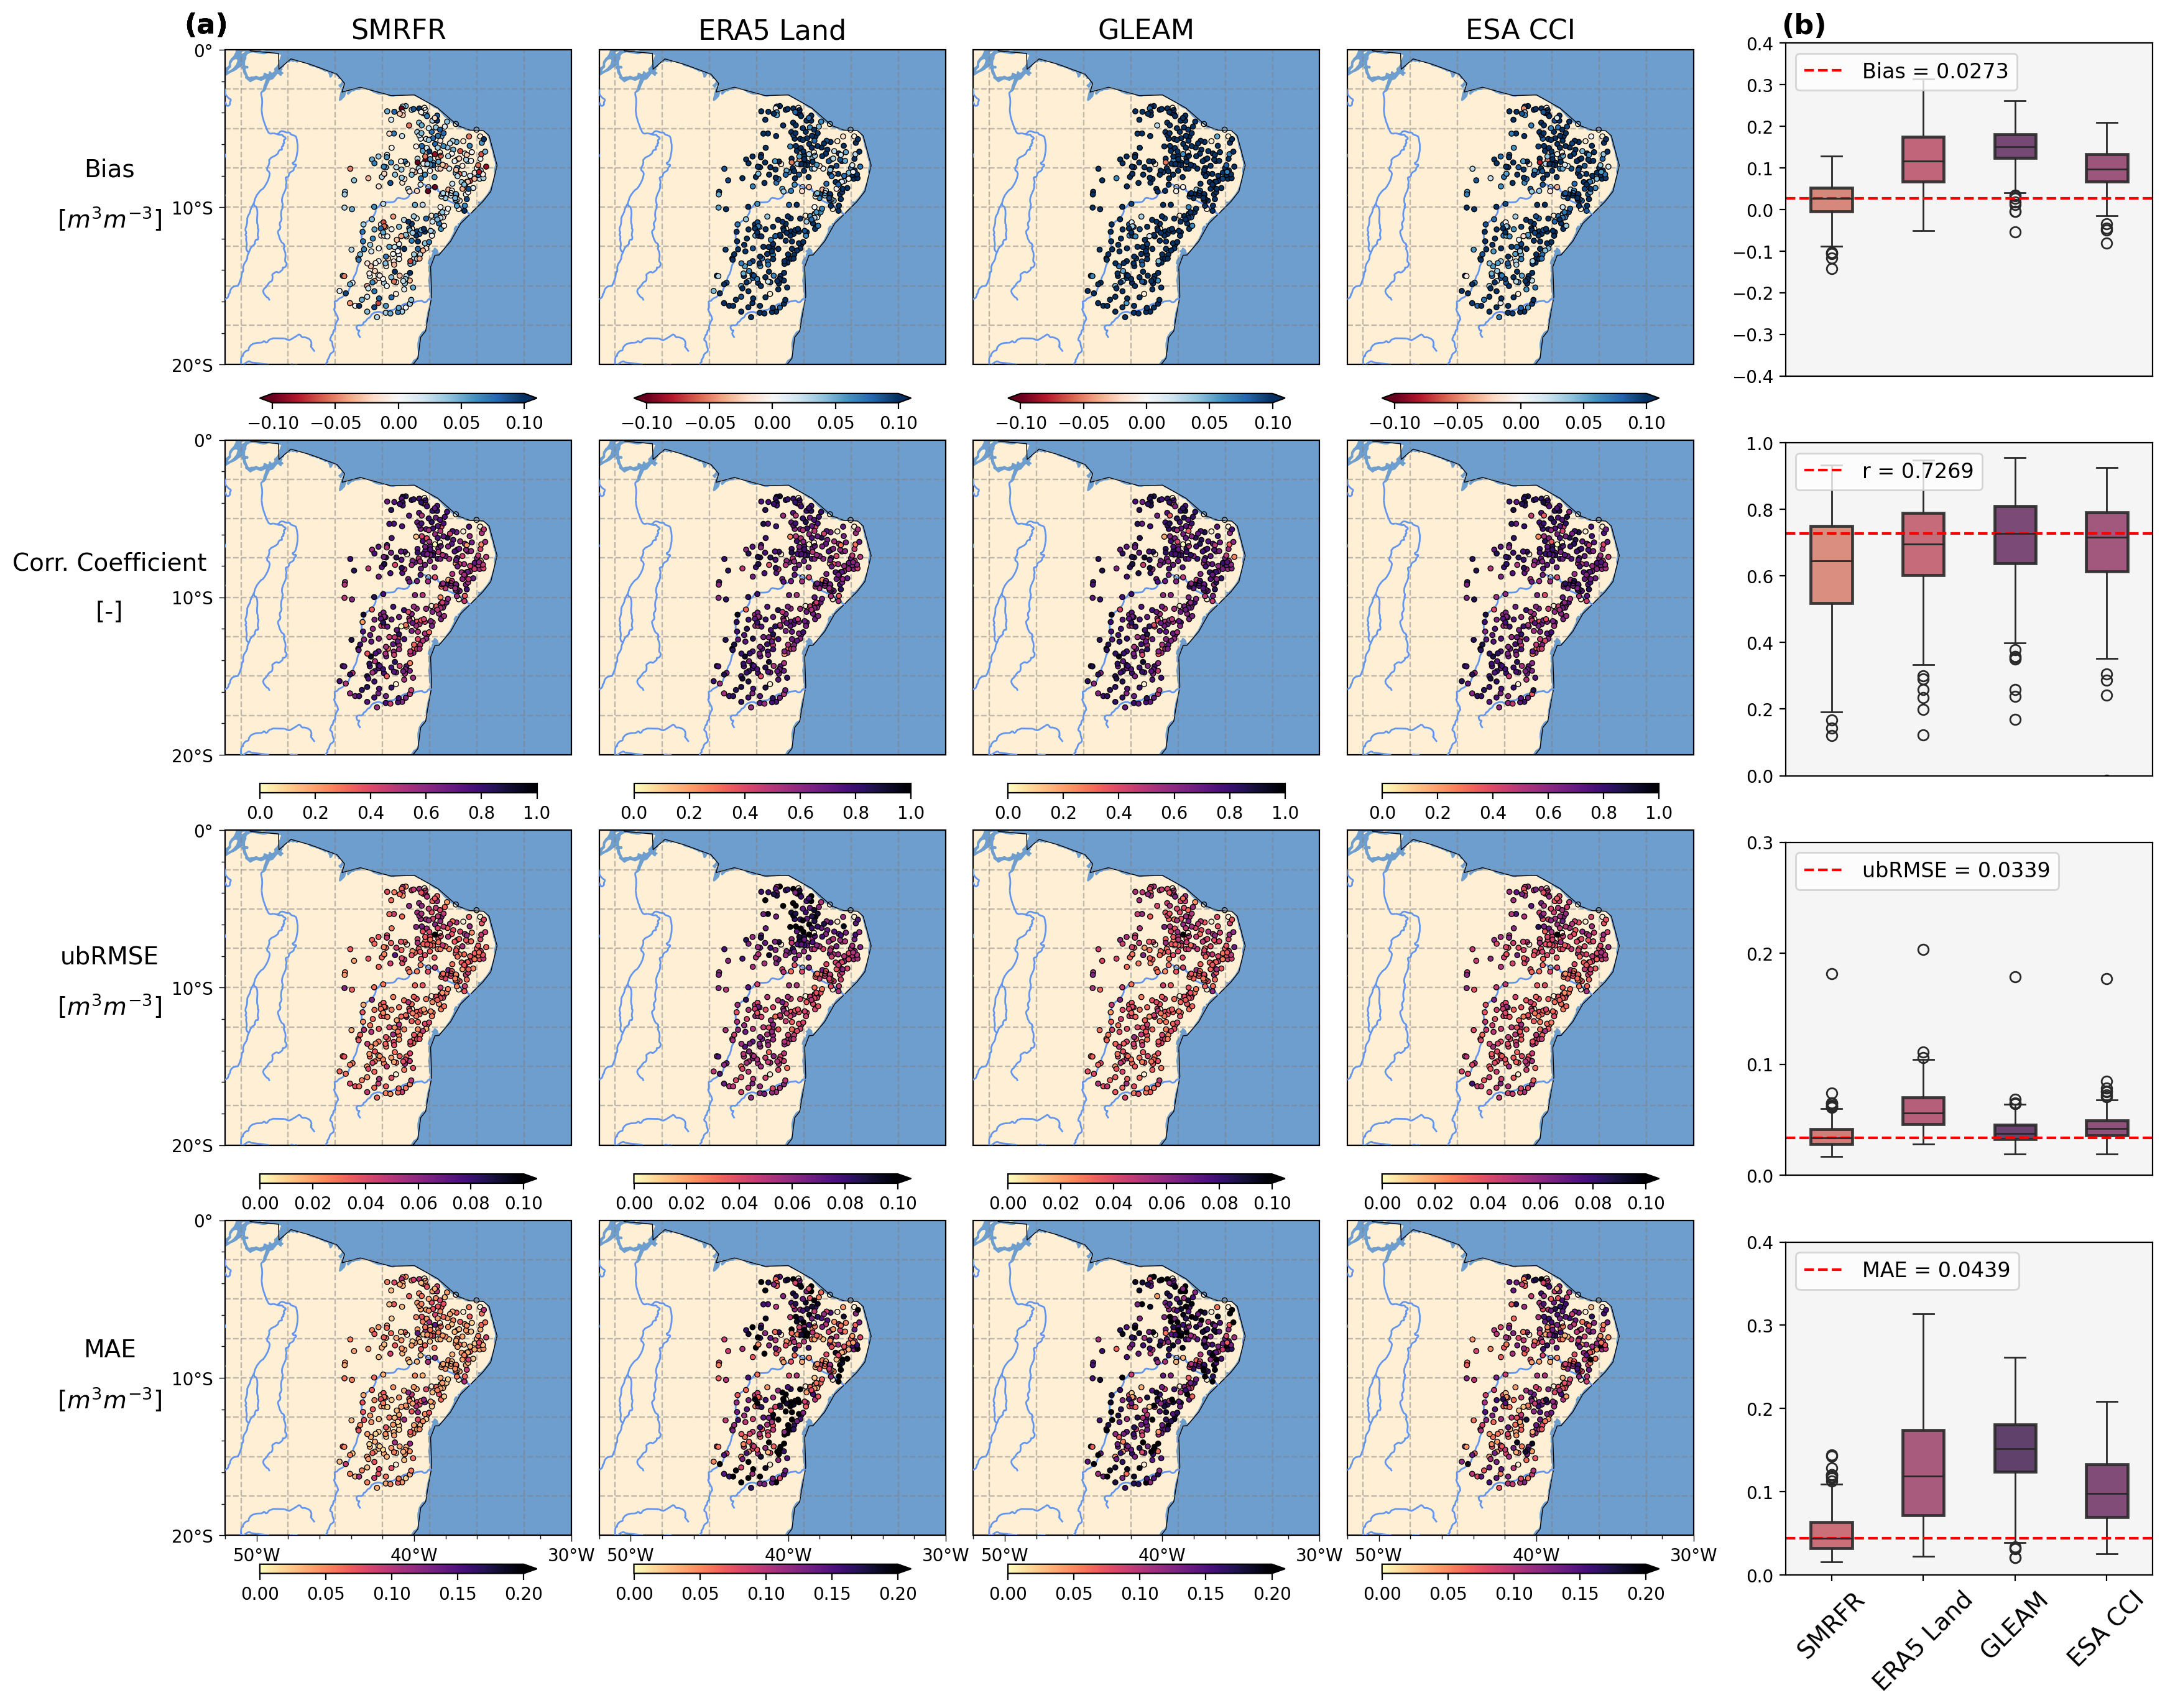

In [7]:
fig=plt.figure(figsize=(22,16),dpi=200)
gs = gridspec.GridSpec(1, 2, figure=fig,
                       wspace=0,hspace=0,
                      width_ratios=[1,10])
gs1 = gridspec.GridSpecFromSubplotSpec(4, 1, height_ratios=[1,1,1,1],
                                       subplot_spec=gs[0],
                                       wspace=0, hspace=0.12)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 2, width_ratios=[4,1],
                                       subplot_spec=gs[1],
                                       wspace=0.1)
gs2 = gridspec.GridSpecFromSubplotSpec(4, 4, width_ratios=[1,1,1,1],
                                       subplot_spec=gs0[0],
                                       wspace=0.08, hspace=0.08)
gs3 = gridspec.GridSpecFromSubplotSpec(4, 1,
                                       subplot_spec=gs0[1],
                                       hspace=0.2)
# statis distribution
data_list = ['smlp', 'era', 'gleam','esa']
unit_list  = [('Bias','$[m^3m^{-3}]$'),('Corr. Coefficient','[-]'),
              ('ubRMSE','$[m^3m^{-3}]$'),('MAE','$[m^3m^{-3}]$')]
metrics_list = ['bias_US10cm','R_US10cm','ubrmse_US10cm','mae_US10cm']
title_list = ['SMRFR','ERA5 Land','GLEAM','ESA CCI']
cmap_list = [(-0.1,0.1),(0,1),(0,0.1),(0,0.2)]
data_crs = ccrs.PlateCarree()


t0=datetime.now()
fts=14
for nrow,metric in enumerate(metrics_list):
    ax0 = fig.add_subplot(gs1[nrow])
    statis,units = unit_list[nrow]
    ax0.text(0.4,0.64,statis,va='center',ha='center',fontsize=fts)
    ax0.text(0.4,0.5,units,va='center',ha='center',fontsize=fts)
    ax0.axis('off')
    
    for ncol,data_name in enumerate(data_list):
        print(f'{metric}-{data_name}')
        ax1 = fig.add_subplot(gs2[nrow,ncol], projection=data_crs)
        x_on,y_on=[0,0]
        if ncol==0:
            y_on=1
        if nrow==3:
            x_on=1
        vmin,vmax = cmap_list[nrow]
        if nrow==0:
            ax0.text(0.9,1.05,'(a)',va='center',ha='center',transform=ax0.transAxes,
                    fontdict={'fontsize':16,'fontweight':'bold'})
            draw_metrics_pts_regional(ax1, df_box, vmin=vmin, vmax=vmax, metrics_name=f'{data_name}_{metric}',
                                      title=title_list[ncol],title_on=1,
                                     y_on=y_on,x_on=x_on)
        else:
            draw_metrics_pts_regional(ax1, df_box, vmin=vmin, vmax=vmax, metrics_name=f'{data_name}_{metric}',
                                  title=title_list[ncol],
                                     y_on=y_on,x_on=x_on)


box_width = 0.45
x_label_size = 14
era5_c = "#f6f6bc"
rf_c = "#96cac1"
esa_c = '#ae132b'
title_s = 16
y_tick_label_size = 14

title_list = ['(a) Bias', '(b) Corr. Coefficient', '(c) ubRMSE','(d) MAE']
label_list = ['SMRFR', 'ERA5 Land', 'GLEAM', 'ESA CCI']

for idx,statis in enumerate(['bias', 'R', 'ubrmse','mae']):
    palette_type = {f'smlp_{statis}_US10cm': "#f6f6bc", 
                    f'era_{statis}_US10cm': "#96cac1",
                    f'esa_{statis}_US10cm':'#ae132b',
                    f'gleam_{statis}_US10cm':"#3CB371"}
    order_list = [f'smlp_{statis}_US10cm', f'era_{statis}_US10cm',
                  f'gleam_{statis}_US10cm', f'esa_{statis}_US10cm']
    
    ax = fig.add_subplot(gs3[idx])
    sns.boxplot(data=df_box,
                ax=ax,
                    order=order_list,
                    palette='flare',
                    width=box_width,
                    boxprops={'linewidth':1.7,'alpha':0.9}
                    )
    ax.set_facecolor('whitesmoke')

    if idx==0:
        ax.text(0.05,1.05,'(b)',va='center',ha='center',transform=ax.transAxes,
               fontdict={'fontsize':16,'fontweight':'bold'})
        ax.set_xticks([])
        ax.set_ylim(-0.4,0.4)
        ax.set_yticks([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4])
        best_per = np.nanmedian(df_box['smlp_bias_US10cm'])
        label = f'Bias = {round(best_per,4)}'
    elif idx==1:
        ax.set_xticks([])
        ax.set_ylim(0,1)
        ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
        best_per = np.nanmedian(df_box['gleam_R_US10cm'])
        label = f'r = {round(best_per,4)}'
    elif idx==2:
        ax.set_xticks([])
        ax.set_ylim(0,0.3)
        ax.set_yticks([0,0.1,0.2,0.3])
        best_per = np.nanmedian(df_box['smlp_ubrmse_US10cm'])
        label = f'ubRMSE = {round(best_per,4)}'
    elif idx==3:
        ax.set_ylim(0,0.4)
        ax.set_yticks([0,0.1,0.2,0.3,0.4])
        best_per = np.nanmedian(df_box['smlp_mae_US10cm'])
        label = f'MAE = {round(best_per,4)}'
        ax.set_xticklabels(label_list, fontsize=x_label_size,rotation=45)
    ax.axhline(y=best_per, color='r', linestyle='--', linewidth=1.5)
    custom_line = Line2D([0], [0], color='r', linestyle='--', label=label)
    ax.legend(handles=[custom_line],loc='upper left',fontsize='large')
    # ax.set_yticklabels(fontsize=y_tick_label_size)

t1=datetime.now()
time_com=(t1-t0).seconds
print(f'{time_com} seconds')

# plt.savefig('../Figures/Figure11.jpg',
#             dpi=600,bbox_inches='tight')